In [1]:
# warning 무시하기
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Tetuan City power consumption.csv")

In [3]:
dataset

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,6.758,73.0,0.080,0.066,0.089,28958.17490


In [4]:
dataset.isnull().sum()

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64

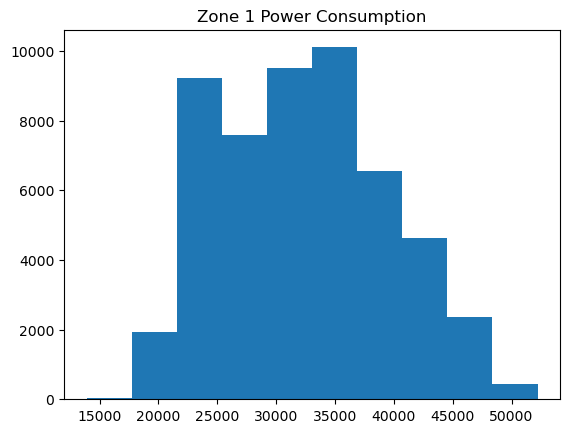

In [5]:
dataset.describe()
plt.hist(dataset['Zone 1 Power Consumption'])
plt.title('Zone 1 Power Consumption')
plt.show()

In [6]:
X=dataset[['Temperature','Humidity','Wind Speed']]
Y=dataset[['Zone 1 Power Consumption']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (3,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                128       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [12]:
N_EPOCHS = 70
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/70
1229/1229 [==============================] - 3s 2ms/step - loss: 531921440.0000 - mse: 531921440.0000 - val_loss: 72246864.0000 - val_mse: 72246864.0000
Epoch 2/70
1229/1229 [==============================] - 2s 1ms/step - loss: 60692636.0000 - mse: 60692636.0000 - val_loss: 55179060.0000 - val_mse: 55179060.0000
Epoch 3/70
1229/1229 [==============================] - 2s 2ms/step - loss: 52899968.0000 - mse: 52899968.0000 - val_loss: 52583848.0000 - val_mse: 52583848.0000
Epoch 4/70
1229/1229 [==============================] - 2s 2ms/step - loss: 51367048.0000 - mse: 51367048.0000 - val_loss: 51822028.0000 - val_mse: 51822028.0000
Epoch 5/70
1229/1229 [==============================] - 2s 2ms/step - loss: 50856544.0000 - mse: 50856544.0000 - val_loss: 51362200.0000 - val_mse: 51362200.0000
Epoch 6/70
1229/1229 [==============================] - 2s 2ms/step - loss: 50576232.0000 - mse: 50576232.0000 - val_loss: 50989444.0000 - val_mse: 50989444.0000
Epoch 7/70
1229/1229 [====

1229/1229 [==============================] - 2s 2ms/step - loss: 39364952.0000 - mse: 39364952.0000 - val_loss: 40374220.0000 - val_mse: 40374220.0000
Epoch 52/70
1229/1229 [==============================] - 2s 2ms/step - loss: 39338856.0000 - mse: 39338856.0000 - val_loss: 39814412.0000 - val_mse: 39814412.0000
Epoch 53/70
1229/1229 [==============================] - 2s 2ms/step - loss: 39310260.0000 - mse: 39310260.0000 - val_loss: 39384772.0000 - val_mse: 39384772.0000
Epoch 54/70
1229/1229 [==============================] - 2s 2ms/step - loss: 39294128.0000 - mse: 39294128.0000 - val_loss: 39610860.0000 - val_mse: 39610860.0000
Epoch 55/70
1229/1229 [==============================] - 2s 2ms/step - loss: 39303764.0000 - mse: 39303764.0000 - val_loss: 39523068.0000 - val_mse: 39523068.0000
Epoch 56/70
1229/1229 [==============================] - 2s 2ms/step - loss: 39308120.0000 - mse: 39308120.0000 - val_loss: 39864280.0000 - val_mse: 39864280.0000
Epoch 57/70
1229/1229 [===========

In [13]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

410/410 [==============================] - 0s 951us/step - loss: 39456040.0000 - mse: 39456040.0000


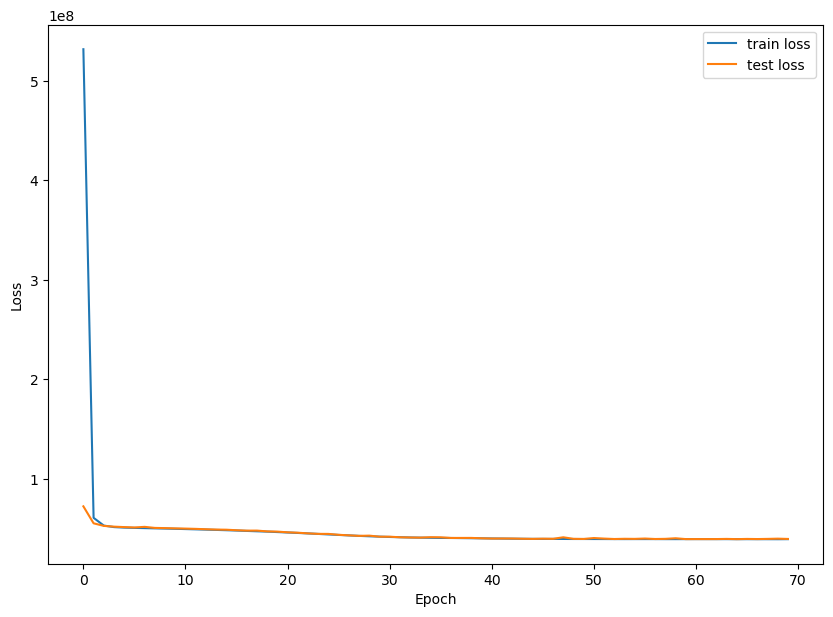

In [14]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

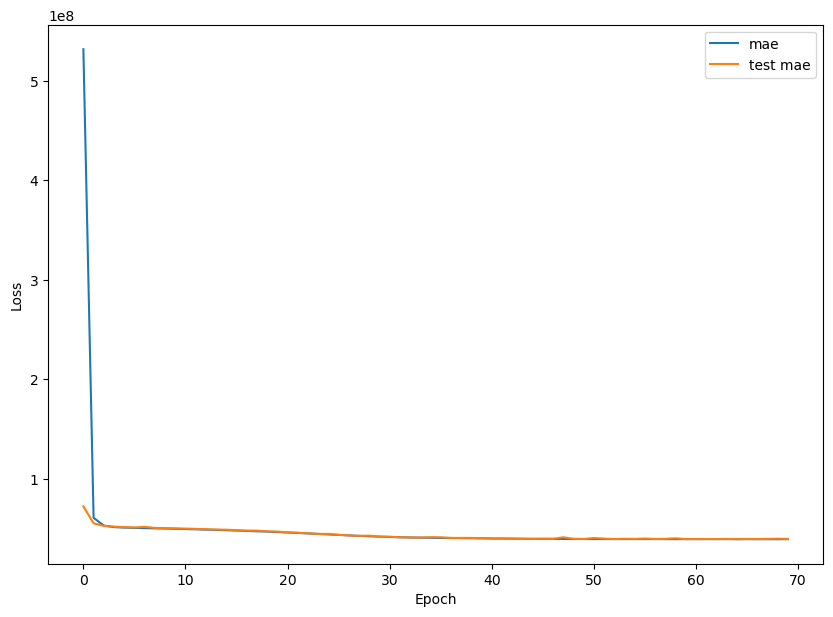

In [17]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()